### author : phyblas
### [phyblas](https://phyblas.hinaboshi.com/20161212)

In [201]:
import numpy as np
import matplotlib.pyplot as plt

## Issues : Pet Monster which damage depends on amount of fruits & vegetable we feed

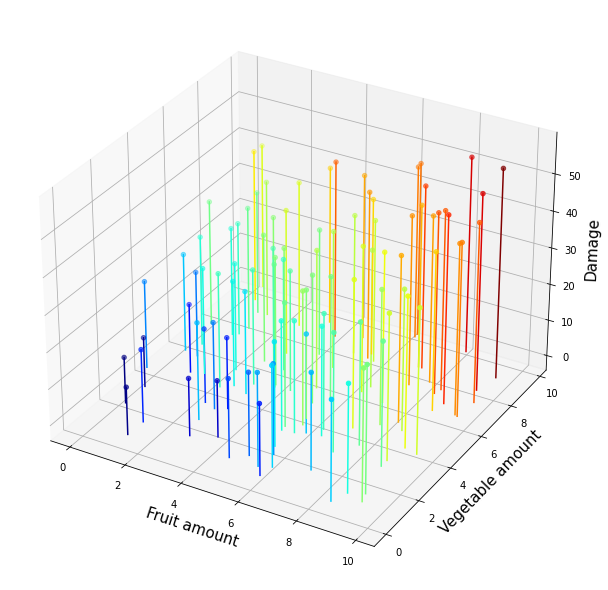

In [202]:
from mpl_toolkits.mplot3d import Axes3D

n = 100
fruit_amt = np.random.uniform(0, 10, n)
veget_amt = np.random.uniform(0, 10, n)
noise = np.random.randn(n) * 3
damage = 10 + fruit_amt*2 + veget_amt*3 + noise

plt.figure(figsize=(8,8))
ax = plt.axes([0,0,1,1], projection='3d')
kw = dict(fontsize=15)
ax.set_xlabel('Fruit amount', **kw)
ax.set_ylabel('Vegetable amount', **kw)
ax.set_zlabel('Damage', **kw)


def color_by_damage(x):
    x = (x - damage.min()) / (damage.max() - damage.min())
    return plt.get_cmap('jet')(x)
# make stems
for i in range(n):
    ax.plot([fruit_amt[i], fruit_amt[i]],
            [veget_amt[i], veget_amt[i]],
            [0, damage[i]], # param want [z_min, z_max]
           color=color_by_damage(damage[i])) # map color of stem
    
# map colors of tip dots
ax.scatter3D(fruit_amt, veget_amt, damage, c=color_by_damage(damage))  

plt.show()

# Find $w_1, \, w_2, \, b $

In [203]:
eta = 0.0001 # learning rate
# eta = 0.0002 not works
n_learns = 10000
n_stop = 1e-7
w1, w2, b = 0, 0 , 0
h = w1*fruit_amt + w2*veget_amt + b
for i in range(n_learns):
    # w += 2*((z-h) * x).sum() * eta # tricky partial differential
    dw1 = (2*(damage-h) * fruit_amt).sum() * eta
    dw2 = (2*(damage-h) * veget_amt).sum() * eta
    db = 2*(damage-h).sum() * eta
    w1 += dw1
    w2 += dw2
    b +=db
    h = w1*fruit_amt + w2*veget_amt + b

    if (abs(dw1) and abs(dw2) and abs(db) < n_stop): break
print(w1, w2, b)

2.0653452807007318 2.8963376855040495 9.790625641742848


# Draw Plane from $w_1, w_2, b $

w1 : 2.07, w2 : 2.90, b : 9.79


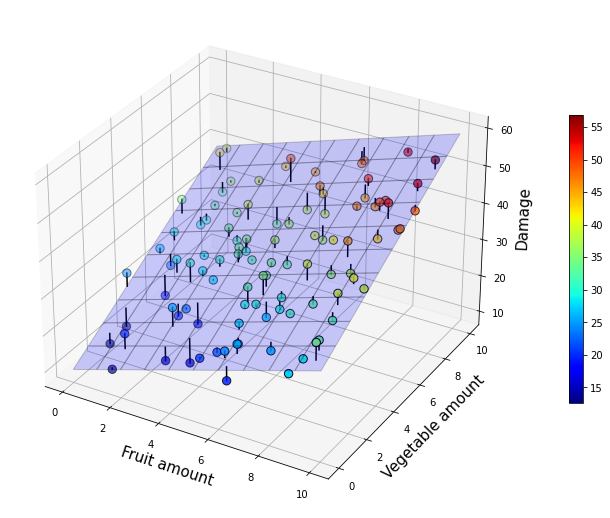

In [204]:
print('w1 : %.2f, w2 : %.2f, b : %.2f' % (w1, w2, b))
plt.figure(figsize=(8,8))
ax = plt.axes([0,0,1,1], projection='3d')

kw = dict(fontsize=15)
ax.set_xlabel('Fruit amount', **kw)
ax.set_ylabel('Vegetable amount', **kw)
ax.set_zlabel('Damage', **kw)

mx, my = np.meshgrid(np.linspace(0, 10, 11), np.linspace(0, 10, 11))

# predict
mz = b + w1*mx + w2*my
# draw plane
ax.plot_surface(mx, my, mz, rstride=1, cstride=1,
               alpha=0.2,  color='b', edgecolor='k')
# draw error stems
h = b + w1*fruit_amt + w2*veget_amt
for i in range(n):
    ax.plot([fruit_amt[i], fruit_amt[i]],
           [veget_amt[i], veget_amt[i]],
           [h[i], damage[i]], 'k')
# tip dots of real values
sc = ax.scatter(fruit_amt, veget_amt, damage,c=damage,
           edgecolor='k', cmap='jet', s=70)
plt.colorbar(sc, fraction=0.025, pad=0.1)
plt.show()

# Upgrade code to support n_features > 2

[9.79062564 2.06534528 2.89633769]


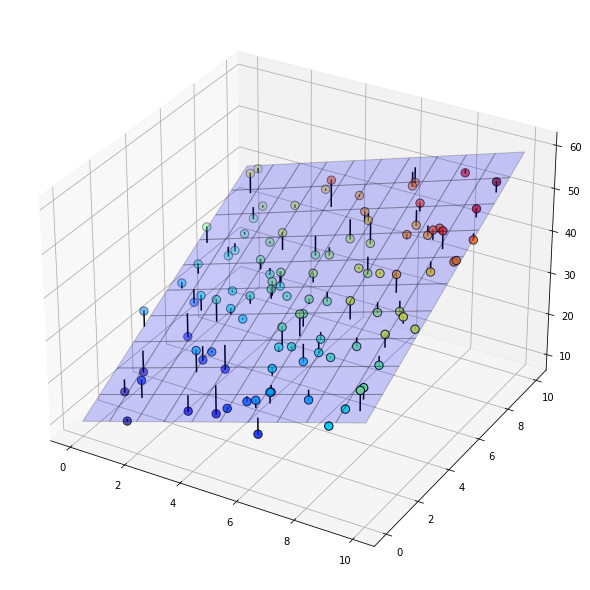

In [205]:
# CALCULATE
eta = 0.0001 # learning rate
# eta = 0.0002 not works
n_learns = 10000
n_stop = 1e-7
food_amt = np.stack([fruit_amt, veget_amt], 1)
w = np.zeros(food_amt.shape[1] + 1)
dw = np.zeros(food_amt.shape[1] + 1)
h = np.dot(food_amt, w[1:] + w[0])

for i in range(n_learns):
    # use Vector/ Matrix to calculate 
    dw[1:] = 2 * np.dot(damage - h, food_amt) * eta 
    dw[0] = 2 * (damage - h).sum() * eta
    w += dw
    h = np.dot(food_amt, w[1:]) + w[0]
    
    if ( np.all(abs(dw) < n_stop)): break
print(w)

# DRAW
plt.figure(figsize=[8,8])
kw = dict(fontsize=15)
ax.set_xlabel('Fruit amount', **kw)
ax.set_ylabel('Vegetable amount', **kw)
ax.set_zlabel('Damage', **kw)

ax = plt.axes([0,0,1,1],projection='3d')

mx,my = np.meshgrid(np.linspace(0,10,11),np.linspace(0,10,11))
mz = w[0] + mx*w[1] + my*w[2]

ax.plot_surface(mx,my,mz,rstride=1,cstride=1,alpha=0.2,color='b',edgecolor='k')
h = w[0] + w[1]*fruit_amt + w[2]*veget_amt
for i in range(n):
    ax.plot([fruit_amt[i], fruit_amt[i]],
           [veget_amt[i], veget_amt[i]],
           [h[i], damage[i]], 'k')
    
sc = ax.scatter(fruit_amt, veget_amt, damage,c=damage,
           edgecolor='k', cmap='jet', s=70)
plt.show()

In [206]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [207]:
np.zeros(food_amt.shape[1] + 1)

array([0., 0., 0.])

In [208]:
np.dot(food_amt, w[1:] + w[0]) # dot matrix/ vector(1d)

array([114.19888761,  65.20766826,  67.14689104,  86.31750053,
       188.18975156, 188.53791318, 113.97710204,  91.571855  ,
       187.00004318, 103.93291921,  80.94346876, 153.4243077 ,
       191.63334389,  45.92546384, 119.66931647, 223.88946829,
        96.9048609 , 130.30503941, 142.69060304, 187.43368728,
        75.66300757, 121.66702201, 122.07060093, 156.37907468,
       217.35616536, 159.71213406,  76.96792418, 209.70318453,
       116.51245094,  40.16268212, 157.61834508, 102.48546242,
       180.53746025, 197.69328279, 110.12798339, 118.7613734 ,
       118.95837732, 159.28760517, 103.37965776,  50.89150548,
       155.32339139,  20.02617837, 167.69129327,  75.29702001,
       191.24340518, 188.80786208,  30.7684386 , 138.18605168,
       124.04372137, 149.69608774,  91.68787939,  74.32394938,
       122.79255654, 117.05338522,  77.26763046, 110.63524195,
       108.93201276, 163.78957042, 131.49714108,  70.19174403,
        98.55259241,  90.32911939,  88.07984704,  59.50

In [209]:
# np.stack([fruit_amt, veget_amt], axis=1) # concept of zip()
# np.vstack((fruit_amt, veget_amt)) # not works
np.column_stack([fruit_amt, veget_amt])[:5]

array([[8.97341651, 0.61561795],
       [4.95244093, 0.51168057],
       [2.69586129, 2.77330651],
       [2.9569766 , 4.0403421 ],
       [8.14476645, 7.2220306 ]])

# Reusable Class

In [210]:
class LinearRegression:
    def __init__(self, eta):
        self.eta = eta
    def learn(self, X, z, n_stops=1e-7, n_learns=10000):
        self.w = np.zeros(X.shape[1] + 1)
        dw = np.zeros(X.shape[1] + 1)
        h = self.predict(X)
        self.sse = [ self.cal_sse(h, z)] # list of see on each round iteration
        for i in range(n_learns):
            eee = 2 * (z-h) * self.eta
            dw[1:] = np.dot(eee, X)
            dw[0] = eee.sum()
            self.w += dw
            h = self.predict(X)
            self.sse += [self.cal_sse(h, z)]
            if (np.all(abs(dw) < n_stops)): break 
    def predict(self, X):
        return np.dot(X, self.w[1:]) + w[0] # format of h = b + w1*x1 + w2*x2 + ...
    def cal_sse(self, h, z):
        return ((h-z)**2).sum()
 

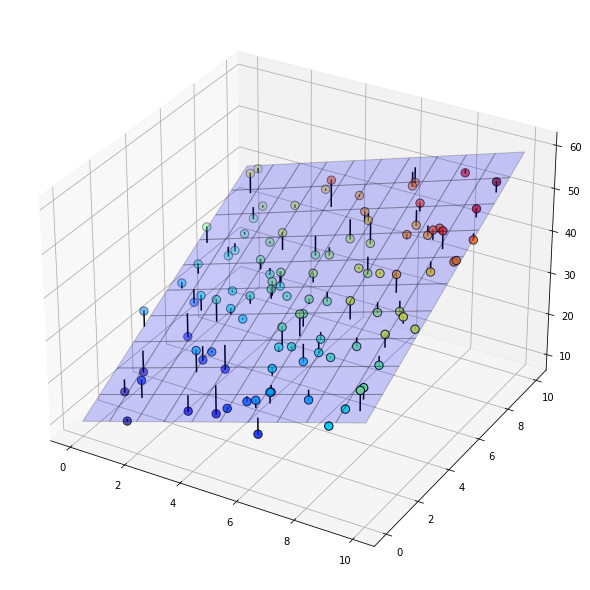

[0.44006335 2.06534528 2.89633767]


In [211]:
# Calculate ( Create model )
food_amt = np.stack([fruit_amt, veget_amt], axis=1)
model = LinearRegression(eta=0.0001)
model.learn(food_amt, damage)

# DRAW
plt.figure(figsize=[8,8])
kw = dict(fontsize=15)
ax.set_xlabel('Fruit amount', **kw)
ax.set_ylabel('Vegetable amount', **kw)
ax.set_zlabel('Damage', **kw)

ax = plt.axes([0,0,1,1],projection='3d')

mx,my = np.meshgrid(np.linspace(0,10,11),np.linspace(0,10,11))

# predict mX = X_trian
mX = np.stack([mx.ravel(), my.ravel()], axis=1)
mz = model.predict(mX).reshape(11, 11)
ax.plot_surface(mx,my,mz,rstride=1,cstride=1,alpha=0.2,color='b',edgecolor='k')

h = model.predict(food_amt)
for i in range(n):
    ax.plot([fruit_amt[i], fruit_amt[i]],
           [veget_amt[i], veget_amt[i]],
           [h[i], damage[i]], 'k')
    
sc = ax.scatter(fruit_amt, veget_amt, damage,c=damage,
           edgecolor='k', cmap='jet', s=70)
plt.show()
print(model.w)

# SSE attribute from model

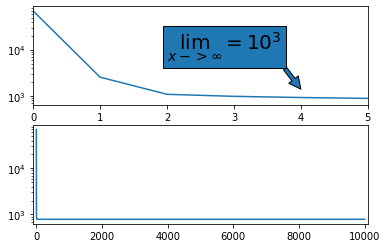

In [212]:
plt.figure()
k = len(model.sse)
plt.subplot(211, yscale='log', xlim=(0, 5), xlabel='n_learns')
# plt.axes()
plt.plot(model.sse)
tex = '$  \lim_{x -> \infty} = 10^3  $'
plt.annotate(tex, xy=(4,1400), xytext=(2, 10000), fontsize=20,
             arrowprops={'shrink':0.001}, bbox={}
            )


plt.subplot(212, yscale='log', xlim=[-k*0.01, k*1.01])
plt.plot(model.sse) # lim(sse) = 10^3


plt.show()

# 5 Feautures ( 5 types of foods ) causes Defensive power to this monster

In [213]:
foods = np.random.uniform(0, 10, [n, 5])
noise = np.random.randn(n)*.1
defends = 1.2 + foods[:,0]*0.5 + foods[:,1]*.3 + \
    foods[:,2]*.2 + foods[:,3]*.7 + foods[:,4]*.1 + noise

In [214]:
defends[:5]
# defends

array([10.36100424, 10.72914219, 10.67825491,  9.74983017,  4.98971094])

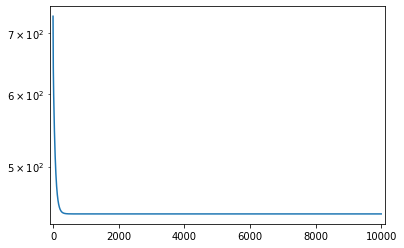

[-5.13   0.139  0.028 -0.049  0.37  -0.31 ]


In [215]:
eta = 0.000005
model = LinearRegression(eta=eta)
model.learn(foods, defends)

plt.figure()
k = len(model.sse)
plt.axes(yscale='log', xlim=(-k*.01, k*1.01))
# plt.axes(yscale='log', xlim=(0,100))
plt.plot(model.sse)
plt.show()
print(model.w.round(3))